This is the 1 epoch
Mean Square error:137.5749969482422
This is the 2 epoch
Mean Square error:34.01078796386719
This is the 3 epoch
Mean Square error:0.11104948818683624
This is the 4 epoch
Mean Square error:0.18267254531383514
This is the 5 epoch
Mean Square error:0.12929506599903107
This is the 6 epoch
Mean Square error:0.05749401077628136
This is the 7 epoch
Mean Square error:0.02836538851261139
This is the 8 epoch
Mean Square error:0.03380659967660904
This is the 9 epoch
Mean Square error:0.06235264241695404
This is the 10 epoch
Mean Square error:0.10479497909545898
This is the 11 epoch
Mean Square error:0.15405963361263275
This is the 12 epoch
Mean Square error:0.20484565198421478
This is the 13 epoch
Mean Square error:0.25331413745880127
This is the 14 epoch
Mean Square error:0.2968292534351349
This is the 15 epoch
Mean Square error:0.3337137997150421
This is the 16 epoch
Mean Square error:0.3629917502403259
This is the 17 epoch
Mean Square error:0.38424965739250183
This is the 1

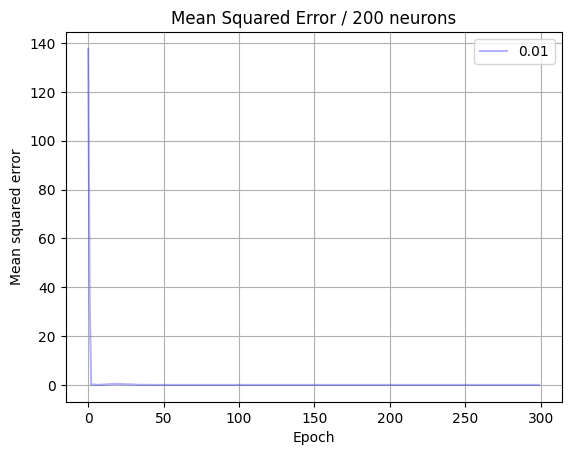

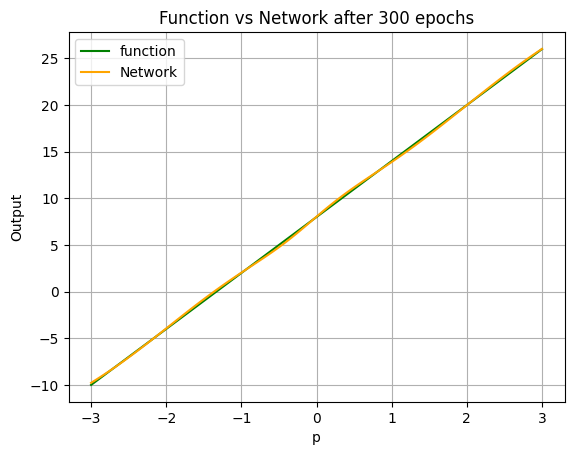

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random
import torch

dtype = torch.float
if torch.cuda.is_available():
    device = torch.device("cuda:0")
else:
    device = torch.device("cpu")

def main():
    epochs=300
    s = 200 #tedad noron ha
    lr = 0.01

    error_list = []
    epoch_list = []


    W_1, b_1, W_2, b_2 = parameter_initialize(s)

    for epoch in range(epochs):
        print("This is the {} epoch".format(epoch + 1))
        epoch_list.append(epoch)
        p = torch.linspace(-3,3,100,dtype = dtype, device=device).reshape(100,1)
        sum = 0
        for iter in range(p.shape[0]):

            a_0 = p[iter][0].reshape(1, 1)

            output, n_2, a_1, n_1 = forward(a_0, W_1, W_2, b_1, b_2)
            target = approximate_function(a_0)
            error = target - output
            square_error = (error.reshape(-1)[0]) * (error.reshape(-1)[0])
            sum += square_error

            s_1, s_2 = backward(error, a_1, W_2)
            W_2, W_1, b_2, b_1 = Update(W_1, W_2, b_1, b_2, lr, s_1, s_2, a_1, a_0)
        mean_square_error = sum/p.shape[0]
        print("Mean Square error:{}".format(mean_square_error))
        error_list.append(mean_square_error)

    #TODO
    y = []
    for x in p.reshape(-1):
        y.append(approximate_function(x))

    plot_error(lr, s, epoch_list, error_list)
    plot_function(p,y)
    plot_network(W_2, W_1, b_2, b_1, p, epochs)




def parameter_initialize(s):
    W_1 = torch.randn(s,1, dtype = dtype, device=device) - 0.5
    b_1 = torch.randn(s,1, dtype = dtype, device=device) - 0.5
    W_2 = torch.randn(1,s, dtype = dtype, device=device) - 0.5
    b_2 = torch.randn(1,1, dtype = dtype, device=device) - 0.5
    return W_1, b_1, W_2, b_2

def forward(a_0, W_1, W_2, b_1, b_2): 

    n_1 = W_1.mm(a_0) + b_1
    a_1 = []

    for i in range(n_1.shape[0]):
          a_1.append(float(1)/(1+math.exp(-n_1[i])))

    a_1 = torch.tensor(a_1, device=device).float().reshape(-1,1)

    n_2 = W_2.mm(a_1) + b_2
    a_2 = n_2

    return a_2,n_2,a_1,n_1

def backward(error, a_1, W_2): 
     s_2 = -2*1*error

     # TODO
     F_1 = []
     for i in range(a_1.shape[0]):
         F_1.append((1-a_1[i][0])*a_1[i][0])
     F_1 = torch.tensor(F_1, device=device).float().reshape(-1)
     F_1 = torch.diag(F_1)

     s_1 = F_1.mm(W_2.t())
     s_1 = s_1.mm(s_2)


     return s_1, s_2

def Update(W_1, W_2, b_1, b_2, lr, s_1, s_2, a_1, a_0 ):

    W_2_new = W_2 - lr*s_2.mm(a_1.t())

    b_2_new = b_2 - lr*s_2

    W_1_new = W_1 - lr*s_1.mm(a_0.t())

    b_1_new = b_1 - lr*s_1

    return W_2_new, W_1_new, b_2_new, b_1_new

def plot_error(lr,s,epoch,error):
    plt.figure()
    if lr==0.1:
        plt.plot(epoch, error, c='red', label=str(lr), alpha = 0.3)
    else:
        plt.plot(epoch, error, c='blue', label=str(lr), alpha = 0.3)

    plt.xlabel('Epoch')
    plt.ylabel('Mean squared error')
    plt.grid(True)
    plt.legend(loc='best')
    plt.title('Mean Squared Error / {} neurons'.format(s))
    plt.show()

def plot_function(input,output):
    input = input.numpy()
    plt.plot(input,output, c='green', label='function')
    plt.xlabel('p')
    plt.ylabel('Output')
    plt.legend(loc='best')



def plot_network(W_2, W_1, b_2, b_1, input, epochs):
    output_list = []
    for x in input:
        x = x.reshape(1,1)
        output, n_2, a_1, n_1 = forward(x,W_1,W_2,b_1,b_2)
        output = output[0]
        output_list.append(output)
    input = input.numpy()
    plt.plot(input,output_list,c='orange',label='Network')
    plt.title('Function vs Network after {} epochs'.format(epochs))
    plt.grid(True)
    plt.legend(loc='best')

    plt.show()


def approximate_function(a_0):
    return a_0*6 + 8






if __name__ == '__main__':
    main()

This is the 1 epoch
Mean Square error:196.2672882080078
This is the 2 epoch
Mean Square error:4.042547702789307
This is the 3 epoch
Mean Square error:3.0817813873291016
This is the 4 epoch
Mean Square error:3.076336145401001
This is the 5 epoch
Mean Square error:2.1698009967803955
This is the 6 epoch
Mean Square error:1.443081259727478
This is the 7 epoch
Mean Square error:0.9075251221656799
This is the 8 epoch
Mean Square error:0.5337865352630615
This is the 9 epoch
Mean Square error:0.2884179651737213
This is the 10 epoch
Mean Square error:0.14072565734386444
This is the 11 epoch
Mean Square error:0.06402076035737991
This is the 12 epoch
Mean Square error:0.03577381744980812
This is the 13 epoch
Mean Square error:0.037599507719278336
This is the 14 epoch
Mean Square error:0.05516602098941803
This is the 15 epoch
Mean Square error:0.07795733213424683
This is the 16 epoch
Mean Square error:0.09887521713972092
This is the 17 epoch
Mean Square error:0.11371105164289474
This is the 18 epo

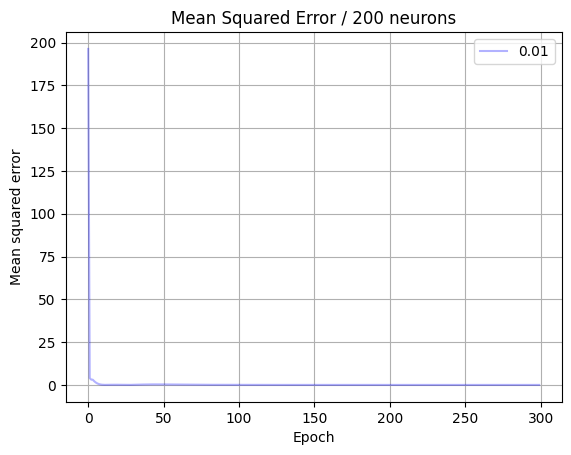

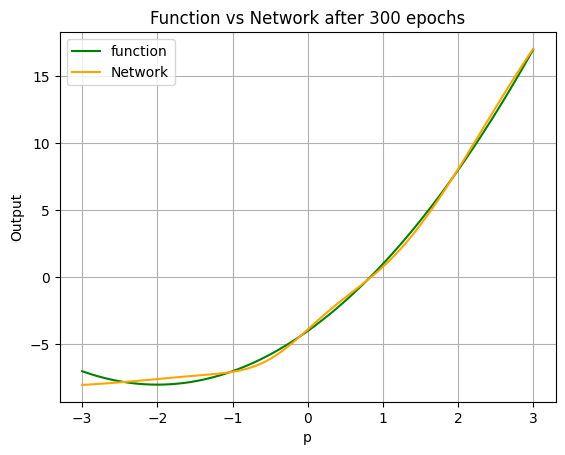

In [2]:
def approximate_function(a_0): #function we want to approximate
    return math.pow(a_0,2) + a_0*4 -4


if __name__ == '__main__':
    main()

This is the 1 epoch
Mean Square error:784.2044677734375
This is the 2 epoch
Mean Square error:331.6658630371094
This is the 3 epoch
Mean Square error:194.6473388671875
This is the 4 epoch
Mean Square error:3.6411938667297363
This is the 5 epoch
Mean Square error:12.20489501953125
This is the 6 epoch
Mean Square error:3.0529773235321045
This is the 7 epoch
Mean Square error:0.7394781708717346
This is the 8 epoch
Mean Square error:2.0765299797058105
This is the 9 epoch
Mean Square error:4.007504940032959
This is the 10 epoch
Mean Square error:5.836896896362305
This is the 11 epoch
Mean Square error:6.8666229248046875
This is the 12 epoch
Mean Square error:6.428583145141602
This is the 13 epoch
Mean Square error:7.128484725952148
This is the 14 epoch
Mean Square error:8.25533676147461
This is the 15 epoch
Mean Square error:7.586066722869873
This is the 16 epoch
Mean Square error:6.601466178894043
This is the 17 epoch
Mean Square error:5.734903335571289
This is the 18 epoch
Mean Square err

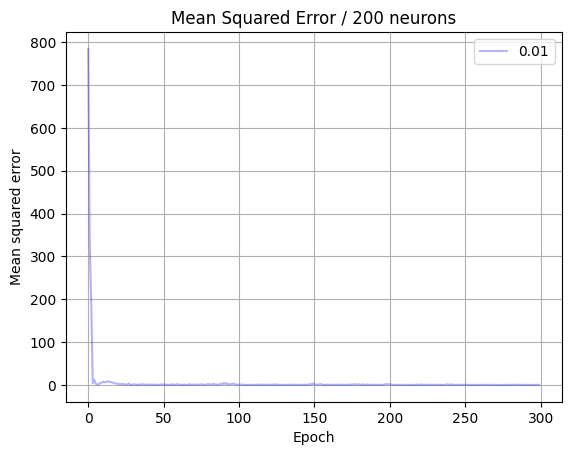

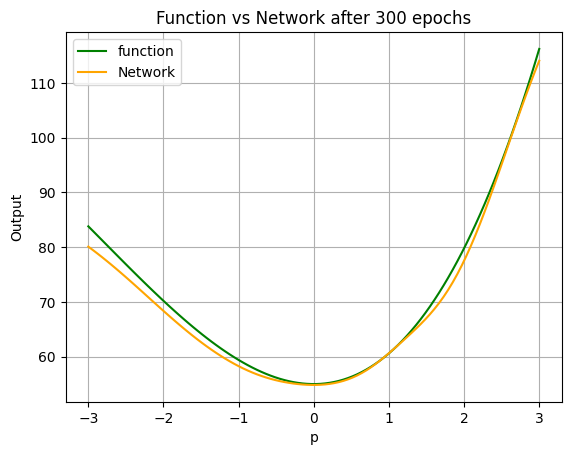

In [3]:
def approximate_function(a_0): #function we want to approximate
    return 0.6*math.pow(a_0,3)+5*math.pow(a_0,2)+55

if __name__ == '__main__':
    main()

This is the 1 epoch
Mean Square error:279.91583251953125
This is the 2 epoch
Mean Square error:3.883366107940674
This is the 3 epoch
Mean Square error:0.5511565208435059
This is the 4 epoch
Mean Square error:0.6456432342529297
This is the 5 epoch
Mean Square error:0.5344510078430176
This is the 6 epoch
Mean Square error:0.42931193113327026
This is the 7 epoch
Mean Square error:0.3401111960411072
This is the 8 epoch
Mean Square error:0.2659069895744324
This is the 9 epoch
Mean Square error:0.20512519776821136
This is the 10 epoch
Mean Square error:0.1561240255832672
This is the 11 epoch
Mean Square error:0.11727949231863022
This is the 12 epoch
Mean Square error:0.08704356104135513
This is the 13 epoch
Mean Square error:0.06397207081317902
This is the 14 epoch
Mean Square error:0.04675126448273659
This is the 15 epoch
Mean Square error:0.03421181067824364
This is the 16 epoch
Mean Square error:0.025334015488624573
This is the 17 epoch
Mean Square error:0.01924893818795681
This is the 18

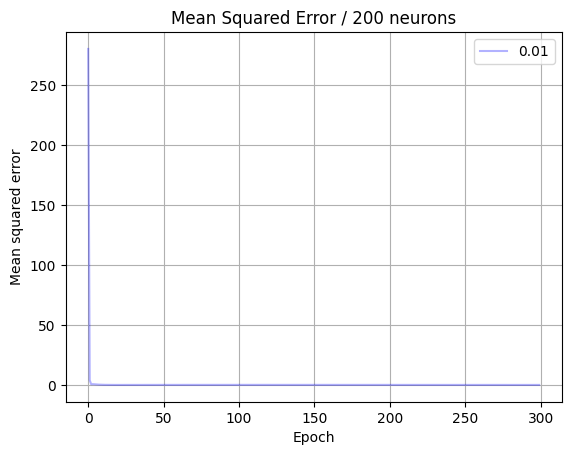

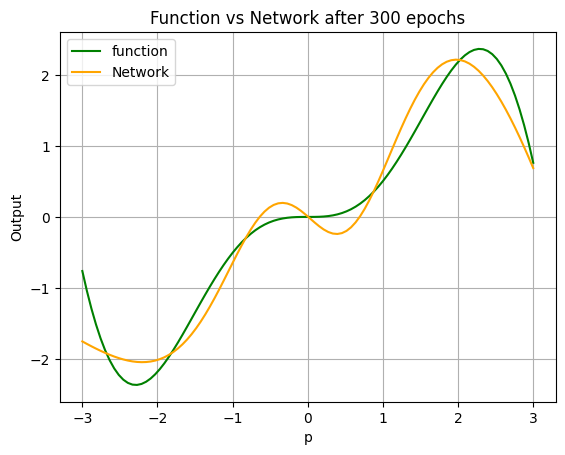

In [4]:
def approximate_function(a_0): #function we want to approximate
    return 0.6*math.pow(a_0,2)*math.sin(a_0)

if __name__ == '__main__':
    main()